<div style="text-align: left">Dino Konstantopoulos lectures and with material from Will Koehrsen!</div>
   
Help from -->  [Will Koehrsen](https://github.com/WillKoehrsen)
  
| Own Code Lines | External Code Lines | Accuracy |
| --- | --- | --- |
| 400| 80 | .94 |
	
 

# And the Oscar goes to ....

This is a great supervised learning problem: we’ve got a nice set of data with information (training data) that we suspect will help us predict who will win this year. This is called classification, since there are only two options for each datapoint: win or not win.
Now the problem is, we don’t know the important trends and relationships within our training data. Our goal is to come up with a program that models these relationships, so we can just input The Green Book and get back win.

Alright. 
</br>
<center>
    <img src =oscars.1.jpg width = 400 />
    *Tadaaaa...*
</center>

Let’s start simple:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## 1. Reading the dataset and Identify the anomalies

In [2]:
# Read in data as pandas dataframe and display the oscar dataset
dataset = pd.read_csv('OscarData.csv')
dataset.head()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
0,1944,BEST PICTURE,Double Indemnity,Crime|Drama|Film-Noir,4.20,107,8.3,125662,96,57,95,35629,0,0,0,0,0,0,0
1,1944,BEST PICTURE,Gaslight,Drama|Thriller,4.03,114,7.8,20733,86,28,90,8460,0,0,0,0,0,0,0
2,1944,BEST PICTURE,Going My Way,Comedy|Drama|Musical,3.56,126,7.2,9228,79,24,76,5748,0,0,0,0,0,0,1
3,1944,BEST PICTURE,Since You Went Away,Drama|War,3.65,177,7.6,3879,80,10,82,1305,0,0,0,0,0,0,0
4,1944,BEST PICTURE,Wilson,Drama,3.21,154,6.8,1314,88,8,41,363,0,0,0,0,0,0,0


In [3]:
# Descriptive statistics for each column
dataset.describe()

,year,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
count,411.000000,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,4.110000e+02,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,1984.000000,3.744891,130.605839,7.703163,2.289712e+05,87.581509,117.270073,83.464720,6.384332e+05,0.133820,0.060827,0.053528,0.063260,0.170316,0.148418,0.182482
std,22.762185,0.295022,25.593356,0.481071,3.218728e+05,11.907778,114.005338,9.163586,4.055703e+06,0.340874,0.239304,0.225358,0.243727,0.376369,0.355948,0.386712
min,1944.000000,2.820000,84.000000,6.200000,1.147000e+03,0.000000,0.000000,41.000000,3.340000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1964.000000,3.565000,113.000000,7.400000,2.047700e+04,84.000000,30.000000,79.000000,9.507500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1985.000000,3.760000,126.000000,7.700000,9.304000e+04,91.000000,60.000000,85.000000,4.973300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2006.000000,3.935000,143.000000,8.000000,3.050575e+05,95.000000,212.500000,90.000000,1.798465e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,4.720000,220.000000,9.300000,2.070726e+06,100.000000,472.000000,98.000000,3.579764e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
dataset = dataset.fillna(dataset.mean())
dataset.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
406,2018,BEST PICTURE,The Favourite,Drama|Comedy,3.82,119,7.7,103011,93,362,67,5754,0,1,0,0,0,0,0
407,2018,BEST PICTURE,Green Book,Drama|Comedy,3.94,130,8.3,170827,78,316,92,7859,0,0,0,0,0,1,1
408,2018,BEST PICTURE,Roma,Drama,3.76,135,7.8,100158,96,353,71,4667,1,1,0,1,1,0,0
409,2018,BEST PICTURE,A Star Is Born,Drama|Romance,3.67,135,7.8,229903,89,472,80,18019,0,1,0,0,0,0,0
410,2018,BEST PICTURE,Vice,Drama|Comedy,3.49,132,7.2,58938,66,326,58,3902,0,0,0,0,0,0,0


In [5]:
#feature list for variable importance
features = dataset.iloc[:,4:18]
feature_list = list(features.columns)
feature_list

['MovieLensrating',
 'runtimeMinutes',
 'IMDBRating',
 'imdb_numVotes',
 'RottenCriticRating',
 'rottencritic_numVotes',
 'RottenRating',
 'rotten_numVotes',
 'won_bafta',
 'won_sa',
 'won_sag',
 'won_cc',
 'won_dga',
 'won_nbra']

In [6]:
#Divide the dataset into features(X) and the label(y) which we have to predict
X = dataset.iloc[:, 4 : 18].values
y = dataset.iloc[:, 18].values

In [7]:
print('The shape of our features is:', X.shape)

The shape of our features is: (411, 14)


In [8]:
#Viewing the sliced label data
y

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

## 2. Splitting the dataset into the Training set and Test set


In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (328, 14)
Training Labels Shape: (328,)
Testing Features Shape: (83, 14)
Testing Labels Shape: (83,)


# Logistic Regression 

Logistic regression is the go-to method for binary classification problems (problems with two class values). We started off our Oscar prediction with trying out logistic regression.

The first 2 steps will be the same and now we move on to fit the Oscar data to the logisitic regression model

## 3. Fitting Logistic Regression to the data set

In [11]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0,solver="lbfgs")
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## 4. Assess Logistic Regression Performance

#### Confusion Matrix for Logistic Regression

In [12]:
# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[67  1]
 [14  1]]


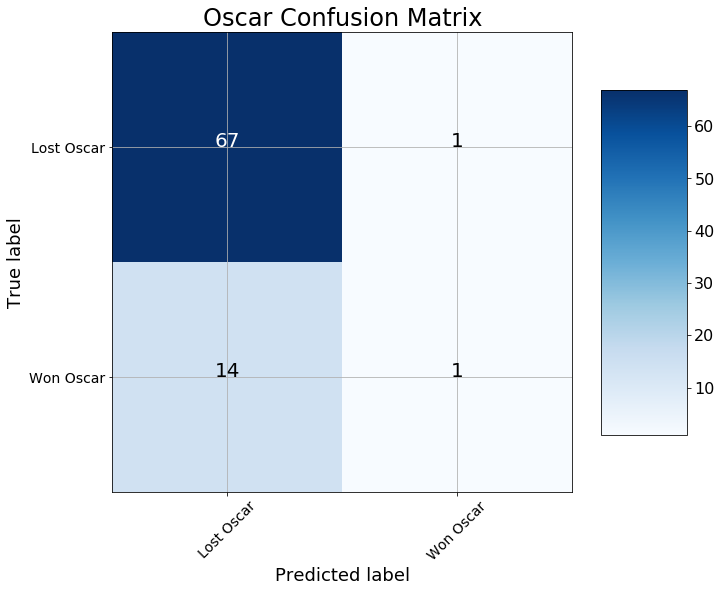

In [82]:
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cm_lg, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b>This matrix shows that there are 67+1=68 correct predictions and only 14+1=15 incorrect predictions. The logistic regression model predicts 14 false positives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 1 false negatives which means the movies which actually lost the oscar but predicted that the movie won the oscar. 


The logistic regression model does not give us great results. Too many false positives and not correct predictions</b>

In [15]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lr))

Accuracy 0.8192771084337349


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

"This approach involves randomly dividing the set of observations into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k − 1 folds."

— Page 181, An Introduction to Statistical Learning, 2013.

In [16]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)
accuracies_lr

array([0.81818182, 0.78787879, 0.81818182, 0.78787879, 0.81818182,
       0.81818182, 0.87878788, 0.81818182, 0.84375   , 0.84375   ])

In [17]:
accuracies_lr.mean()

0.8232954545454545

<b>The Logistic Regression performance shows 83% which is good in it's terms.</b>

Let's try and build a ROC curve to check the performance

In [18]:
# Make probability predictions
train_probs_lr = classifier_lr.predict_proba(X_train)[:, 1]
probs_lr = classifier_lr.predict_proba(X_test)[:, 1]

train_predictions_lr = classifier_lr.predict(X_train)
predictions_lr = classifier_lr.predict(X_test)

In [19]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_lr)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_lr)}')

Train ROC AUC Score: 0.5644900497512436
Test ROC AUC  Score: 0.5068627450980392


In [20]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


In [21]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'g', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.07 Train: 0.12
Precision Baseline: 0.18 Test: 0.5 Train: 0.7
Roc Baseline: 0.5 Test: 0.51 Train: 0.56


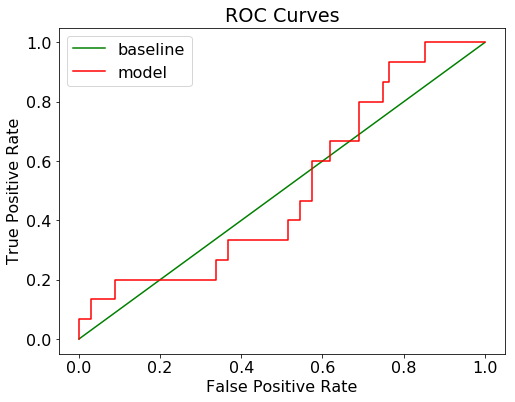

In [22]:
evaluate_model(predictions_lr, probs_lr, train_predictions_lr, train_probs_lr)

<b> Our Logistic regression gives a score of 59 for training data but 46 for test which are bad results.
    
High recall and low precision means most of the positive examples are correctly recognized but lot of false positives</b>

## 5.Finally the Logistic Regression Model predicts the Oscars

In [23]:
# Separate the dataset into train and test to predict the Oscar's
train_lr = dataset[dataset['year']<=2000]
train_lr.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
277,2000,BEST PICTURE,Chocolat,Drama|Romance,3.68,121,7.3,167453,62,117,83,328835,0,0,0,0,0,0,0
278,2000,BEST PICTURE,"Crouching Tiger, Hidden Dragon",Action|Adventure|Fantasy,3.54,120,7.9,238676,97,153,86,427169,0,1,0,0,1,1,0
279,2000,BEST PICTURE,Erin Brockovich,Drama,3.58,131,7.3,157701,84,145,81,418491,0,0,0,0,0,0,0
280,2000,BEST PICTURE,Gladiator,Action|Adventure|Drama,3.96,155,8.5,1197072,76,194,87,34128074,1,0,0,1,0,0,1
281,2000,BEST PICTURE,Traffic,Crime|Drama|Thriller,3.80,147,7.6,185430,92,158,85,190305,0,1,1,0,0,0,0


In [24]:
test_lr = dataset[dataset['year']>2000]
test_lr.tail()

,year,category,title,genres,MovieLensrating,runtimeMinutes,IMDBRating,imdb_numVotes,RottenCriticRating,rottencritic_numVotes,RottenRating,rotten_numVotes,won_bafta,won_sa,won_sag,won_cc,won_dga,won_nbra,won_oscar
406,2018,BEST PICTURE,The Favourite,Drama|Comedy,3.82,119,7.7,103011,93,362,67,5754,0,1,0,0,0,0,0
407,2018,BEST PICTURE,Green Book,Drama|Comedy,3.94,130,8.3,170827,78,316,92,7859,0,0,0,0,0,1,1
408,2018,BEST PICTURE,Roma,Drama,3.76,135,7.8,100158,96,353,71,4667,1,1,0,1,1,0,0
409,2018,BEST PICTURE,A Star Is Born,Drama|Romance,3.67,135,7.8,229903,89,472,80,18019,0,1,0,0,0,0,0
410,2018,BEST PICTURE,Vice,Drama|Comedy,3.49,132,7.2,58938,66,326,58,3902,0,0,0,0,0,0,0


In [25]:
#target varaiable which you want to predict
target_lr = train_lr['won_oscar'].values
target_lr

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [26]:
#Define the feature names based on which you want the Oscar's to be predicted
feature_names_lr = [
    'won_bafta',
    'won_dga',
    'won_sa',
    'won_sag',
    'won_cc',
    'IMDBRating'
]
features_lr = train_lr[feature_names_lr].values
features_lr

array([[0. , 0. , 0. , 0. , 0. , 8.3],
       [0. , 0. , 0. , 0. , 0. , 7.8],
       [0. , 0. , 0. , 0. , 0. , 7.2],
       ...,
       [0. , 0. , 0. , 0. , 0. , 7.3],
       [1. , 0. , 0. , 0. , 1. , 8.5],
       [0. , 0. , 1. , 1. , 0. , 7.6]])

In [27]:
classifier_lr.fit(features_lr, target_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
test_features_lr = test_lr[feature_names_lr].values
pred_LR = classifier_lr.predict_proba(test_features_lr)[:,1]

Using [:,1] in the code will give you the probabilities of getting the output as 1. If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

In [29]:
movie_name = np.array(test_lr['title'])
year = np.array(test_lr['year'])
oscar = np.array(test_lr['won_oscar'])

In [30]:
prediction = pd.DataFrame(pred_LR.round(2), movie_name,columns =["Probability"] )
prediction["year"] = year
prediction["Actually Oscar"] = oscar

In [31]:
prediction.tail(25)

,Probability,year,Actually Oscar
Fences,0.07,2016,0
Hacksaw Ridge,0.07,2016,0
Hell or High Water,0.07,2016,0
Hidden Figures,0.08,2016,0
La La Land,0.82,2016,0
Lion,0.67,2016,0
Manchester by the Sea,0.05,2016,0
Moonlight,0.06,2016,1
Call Me by Your Name,0.08,2017,0
Darkest Hour,0.07,2017,0


</br>
<center>
    <img src =predictions.jpg width = 400 />
    *Please work...*
</center>

<b>Well the logistic regression model is a start to our machine learning classification problem for predicting the Oscars. It did not give us great results with the test data and it also does not predict correct results. It predicts "Roma" as the Oscar winner rather than the actual winner "Green Book"

    It also predicts "La La Land" instead of "MoonLight" for the Best Picture"

</b> 

# Decision Trees

A decision tree is the building block of a random forest and is an intuitive model. We can think of a decision tree as a series of yes/no questions asked about our data eventually leading to a predicted class. 

Presumably, the odds of an Oscar win could depend on critic ratings,IMDb ratings,previous awards won(BAFTA,SAG,NBRA) or even the genre. According to the Atlantic (see references below), dramas are more likely to win than any other category. And maybe a win also depends on the time of year the movie was released, so if the movie debuted near Oscars nominations season, you might have a better shot

https://www.theatlantic.com/entertainment/archive/2014/03/the-secrets-to-winning-an-academy-award/284158/

## 3. Fitting Decision Tree to the training set
To create a decision tree and train (fit) it on the data, we use Scikit-Learn.

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
print(f'Decision tree has {classifier_dt.tree_.node_count} nodes with maximum depth {classifier_dt.tree_.max_depth}.')

Decision tree has 69 nodes with maximum depth 10.


## 4. Variable Importance based on model

In [34]:
# Get numerical feature importances
importances_tree = list(classifier_dt.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_tree)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: won_dga              Importance: 0.39
Variable: rottencritic_numVotes Importance: 0.13
Variable: rotten_numVotes      Importance: 0.09
Variable: runtimeMinutes       Importance: 0.07
Variable: RottenCriticRating   Importance: 0.07
Variable: imdb_numVotes        Importance: 0.06
Variable: won_cc               Importance: 0.05
Variable: IMDBRating           Importance: 0.04
Variable: MovieLensrating      Importance: 0.03
Variable: RottenRating         Importance: 0.03
Variable: won_sag              Importance: 0.02
Variable: won_nbra             Importance: 0.02
Variable: won_bafta            Importance: 0.0
Variable: won_sa               Importance: 0.0


## 5. Visualization of the Decision Tree Model

In [35]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Export the image to a dot file
export_graphviz(classifier_dt, out_file = 'tree_oscars_dt.dot', feature_names = feature_list, class_names=['won','lost'],max_depth = 10,rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_oscars_dt.dot')

# Write graph to a png file
graph.write_png('tree_oscars_dt.png'); 

<br />
<center>
<img src = tree_oscars_dt.png width = 1000 />
</center>

## 6. Assess Decision Tree Performance

<b> Confusion Matrix for Decision Tree </b>

In [36]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

Confusion matrix, without normalization
[[65  3]
 [ 5 10]]


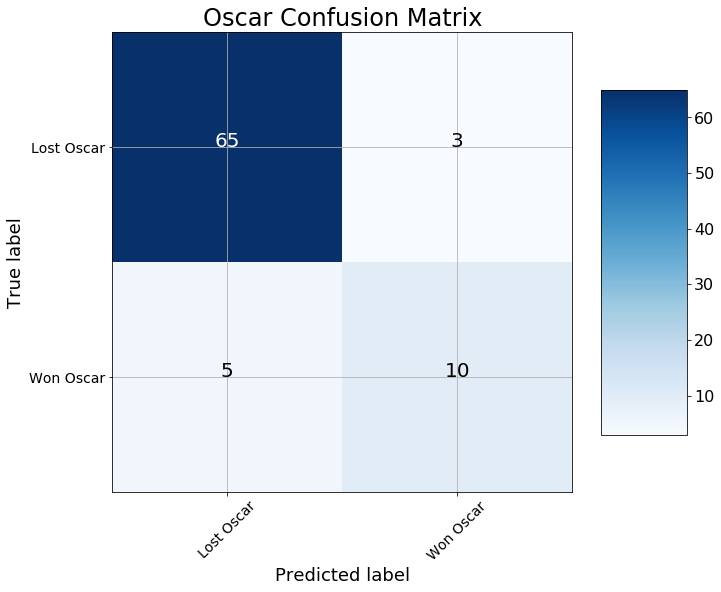

In [83]:
plot_confusion_matrix(cm_dt, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b> This matrix shows that there are 65+10=75 correct predictions and only 5+3=8 incorrect predictions.
The decision tree model predicts 5 false positives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 3 false negatives which means the movies which actually lost the oscar but predicted that the movie won the oscar. So in all, the model predicts more false positives but better than logistic regression. This could be improved using a Random Forest Classifier</b>

In [39]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dt))

Accuracy 0.9036144578313253


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

In [40]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 5)
accuracies_dt

array([0.93939394, 0.8030303 , 0.81818182, 0.87692308, 0.92307692])

In [41]:
accuracies_dt.mean()

0.8721212121212121

<b>The Decision tree performance is 85% which is decent.</b>

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [42]:
# Make probability predictions
train_probs_dt = classifier_dt.predict_proba(X_train)[:, 1]
probs_dt = classifier_dt.predict_proba(X_test)[:, 1]

train_predictions_dt = classifier_dt.predict(X_train)
predictions_dt = classifier_dt.predict(X_test)

In [43]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_dt)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_dt)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.8112745098039215


In [44]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.67 Train: 1.0
Precision Baseline: 0.18 Test: 0.77 Train: 1.0
Roc Baseline: 0.5 Test: 0.81 Train: 1.0


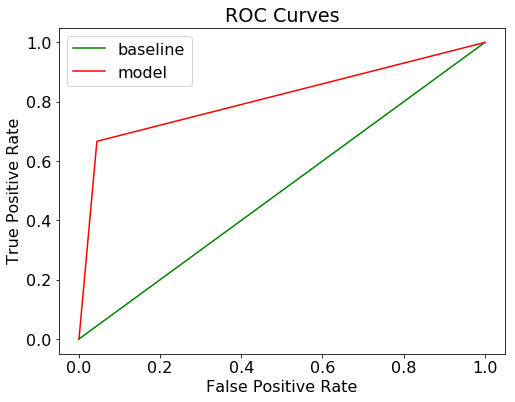

In [45]:
evaluate_model(predictions_dt, probs_dt, train_predictions_dt, train_probs_dt)

<b>Our decision tree for Oscars achieves the perfect score for the training data. But the test data is not great, and can be seen that there is overfitting of the training data.

Low recall and hgh precision means we miss a lot of positive examples (High False positives) but those we predict as positives are indeed positive (Low False negatives)
</b>

## 7. Finally our Decision Tree Model predicts the Oscars

In [46]:
test_features = dataset[feature_list].values

pred_tree = classifier_dt.predict_proba(test_features)[:,1]
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])


In [47]:
tree_prediction = pd.DataFrame(pred_tree,movie_name,columns =["Probability"] )
tree_prediction["Year"] = year 
tree_prediction["Won Oscar"] = won_oscar

In [48]:
tree_prediction.tail(20)

,Probability,Year,Won Oscar
Lion,0.0,2016,0
Manchester by the Sea,0.0,2016,0
Moonlight,1.0,2016,1
Call Me by Your Name,0.0,2017,0
Darkest Hour,0.0,2017,0
Dunkirk,0.0,2017,0
Get Out,0.0,2017,0
Ladybird,0.0,2017,0
Phantom Thread,0.0,2017,0
The Post,0.0,2017,0


</br>
<center>
    <img src =working.gif width = 400 />
    *Yassss...*
</center>

<b>The decision tree predicts the correct Oscar winner and did way better than logisitc regression model.Andddd the Decision tree predicts "Green Book" as the winner.Yay!  </b>

But not so good results with the model accuracy and performance. We could try to improve the results by trying another classifier

# Random Forest Classifier 

The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

<b>Not great results using a decision tree as we can see above. Let's try using a Random Forest Classifier</b>

Here we directly jump to the <b>3rd</b> step from above. As we have done the data pre-processing in the decision tree steps

## 3. Fitting Random Forest to the training set
To create a decision tree and train (fit) it on the data, we use Scikit-Learn.

In [49]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100,random_state = 0,criterion = 'entropy')
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## 4. Variable Importance based on model

In [50]:
# Get numerical feature importances
importances_forest = list(classifier_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances_forest)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: won_dga              Importance: 0.28
Variable: rottencritic_numVotes Importance: 0.12
Variable: imdb_numVotes        Importance: 0.08
Variable: rotten_numVotes      Importance: 0.08
Variable: runtimeMinutes       Importance: 0.07
Variable: RottenCriticRating   Importance: 0.07
Variable: MovieLensrating      Importance: 0.06
Variable: IMDBRating           Importance: 0.06
Variable: RottenRating         Importance: 0.06
Variable: won_cc               Importance: 0.05
Variable: won_bafta            Importance: 0.03
Variable: won_sag              Importance: 0.02
Variable: won_nbra             Importance: 0.02
Variable: won_sa               Importance: 0.01


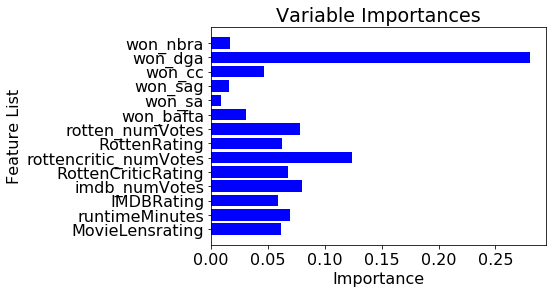

In [51]:
# list of x locations for plotting
x_values = list(range(len(importances_forest)))

# Make a horizontal bar chart
plt.barh(x_values, importances_forest,color="blue",align="center")

# Tick labels for y axis
plt.yticks(x_values, feature_list)
#plt.ylim(-0.5,11.5)

# Axis labels and title
plt.ylabel('Feature List'); plt.xlabel('Importance'); plt.title('Variable Importances'); 

## 5. Visualization of the Random Forest Model

In [52]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = classifier_rf.estimators_[13]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_oscars_rf.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_oscars_rf.dot')

# Write graph to a png file
graph.write_png('tree_oscars_rf.png'); 

<br />
<center>
<img src = tree_oscars_rf.png width = 1000 />
</center>

In [53]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 14


In [54]:
# Limit depth of tree to 2 levels
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 4,criterion = 'entropy', random_state = 0)
rf_small.fit(X_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_oscars.dot', feature_names = feature_list, class_names=['won','lost'],rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree_oscars.dot')

graph.write_png('small_tree_oscars.png');

<br/>
<center>
<img src = small_tree_oscars.png width = 1000 />
</center>

## 6. Assess Random Forest Performance

<b> Confusion Matrix for Random Forest </b>

In [55]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization
[[66  2]
 [ 5 10]]


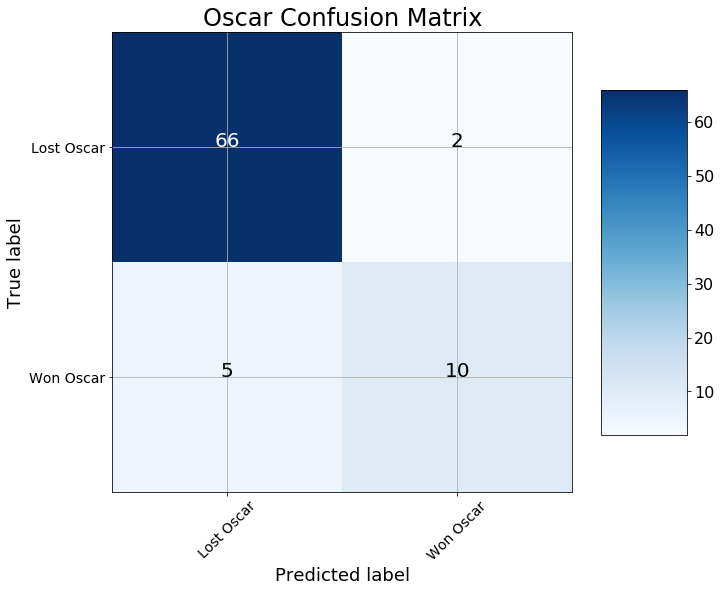

In [84]:
plot_confusion_matrix(cm_rf, classes = ['Lost Oscar', 'Won Oscar'],
                      title = 'Oscar Confusion Matrix',cmap=plt.cm.Blues)

<b> This matrix shows that there are 66+10=76 correct predictions and only 5+2=7 incorrect predictions. This seems to be a better model than the decision tree.

The random forest model predicts 5 false positives which means the movies which actually won the oscar but predicted that the movie lost and the model also predicted 2 false negatives which means the movies which actually lost the oscar but predicted that the movie won the oscar.

Using the random forest model the false negatives are lesser,which means our model is headed in the right direction and is doing better than the decision tree model</b>

In [58]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy 0.9156626506024096


<b>Let's try the k-Fold Cross Validation is applied to improve the model performance</b>

In [59]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 8)
accuracies_rf

array([0.85714286, 0.92857143, 0.9047619 , 0.80952381, 0.875     ,
       0.875     , 0.925     , 0.925     ])

In [60]:
accuracies_rf.mean()

0.8875

<b>The Random Forest performance is 91% which is better than the Decision tree's model.</b>

In [61]:
# Make probability predictions
train_probs_rf = classifier_rf.predict_proba(X_train)[:, 1]
probs_rf = classifier_rf.predict_proba(X_test)[:, 1]

train_predictions_rf = classifier_rf.predict(X_train)
predictions_rf = classifier_rf.predict(X_test)

In [62]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_rf)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs_rf)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.957843137254902


In [63]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


Recall Baseline: 1.0 Test: 0.67 Train: 1.0
Precision Baseline: 0.18 Test: 0.83 Train: 1.0
Roc Baseline: 0.5 Test: 0.96 Train: 1.0


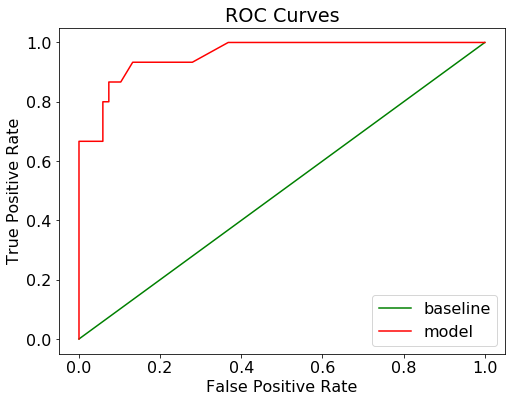

In [64]:
evaluate_model(predictions_rf, probs_rf, train_predictions_rf, train_probs_rf)

<b>Sooo, our random forest model has done wayy better than the deicison tree model. The training data as usual is perfect, but the testing data has also done a better with a Roc of 0.96. Also the AUC is greater which means its a better model for our Oscar data.
    
Low recall and high precision means we miss a lot of positive examples (High False positives) but those we predict as positives are indeed positive (Low False negatives)   

</b>

## 7. Finally our Decision Tree Model predicts the Oscars

In [65]:
test_features = dataset[feature_list].values

pred_forest = classifier_rf.predict_proba(test_features)[:,1]
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])

In [66]:
forest_prediction = pd.DataFrame(pred_forest,movie_name,columns =["Probability"] )
forest_prediction["Year"] = year 
forest_prediction["Won Oscar"] = won_oscar

In [67]:
forest_prediction.tail(20)

,Probability,Year,Won Oscar
Lion,0.20,2016,0
Manchester by the Sea,0.03,2016,0
Moonlight,0.81,2016,1
Call Me by Your Name,0.03,2017,0
Darkest Hour,0.03,2017,0
Dunkirk,0.01,2017,0
Get Out,0.02,2017,0
Ladybird,0.04,2017,0
Phantom Thread,0.07,2017,0
The Post,0.11,2017,0


<b>Model Accuracy is better and the Oscar Prediction shows the correct result!.
    
    And we predict Green Book as the winner with a higher probability.
    
 *Let us check for the ever so famous "La La Land" and "Moon Light" for 2016*</b>

In [68]:
forest_prediction.loc[forest_prediction['Year'] == 2016]

,Probability,Year,Won Oscar
Arrival,0.02,2016,0
Fences,0.02,2016,0
Hacksaw Ridge,0.17,2016,0
Hell or High Water,0.00,2016,0
Hidden Figures,0.10,2016,0
La La Land,0.29,2016,0
Lion,0.20,2016,0
Manchester by the Sea,0.03,2016,0
Moonlight,0.81,2016,1


<b>The random forest still predicts Moonlight as the Oscar Winner.* Well the data cannot go wrong and we users really were rooting for La La Land to win. 
    
    So the Random Forest predicts "Green Book" as the Best Picture winner. 

We have predicted the correct Oscar winners for the 2019 which is "Green Book". Not to brag our model also predicted that 2018 winners "The Shape of Water".

</b>


<center>
    <img src =giphy.gif width = 500 />
    *Yay! Random Forest...*
</center>



# Artificial Neural Networks (ANN)

Artificial Neural Networks are relatively crude electronic models based on the neural structure of the brain. We try our hands at predicting the Oscars with ANN using Keras. 

In [69]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## 1. Initialising the ANN

In [70]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# Initialising the ANN
classifier_ann = Sequential()

## 2. Adding the Input and Hidden Layers

This is a binary classification problem. We use Rectifier function for the activation function for inputs and we use the sigmoid function for the output layer. We take the avrage of the independent variables & dependendent variables and use for the units(14=1=15/2 = 7.5~8)

We have two hidden layers in our network. Hidden layers help increase the flexibility of the neuron in predicting the Oscars

In [72]:
# Adding the input layer and the first hidden layer
classifier_ann.add(Dense(kernel_initializer = 'uniform', activation = 'relu', input_dim = 14,units=8))

# Adding the second hidden layer
classifier_ann.add(Dense(kernel_initializer = 'uniform', activation = 'relu',units=8))
classifier_ann.add(Dense(kernel_initializer = 'uniform', activation = 'relu',units=8))

# Adding the output layer
classifier_ann.add(Dense(kernel_initializer = 'uniform', activation = 'sigmoid',units=1))

## 3. Compiling the ANN

As it is binary classification problem, we use the Stochastic gradient optimizer(SGD) optimizer which is adam and binary_crossentropy which is a logarithmic loss function

In [73]:
classifier_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 4. Fitting ANN to the data set

In [74]:
# Fitting the ANN to the Training set
classifier_ann.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
328/328 [==============================] - 0s 591us/step - loss: 0.6827 - acc: 0.8049
Epoch 2/100
328/328 [==============================] - 0s 236us/step - loss: 0.6434 - acc: 0.8171
Epoch 3/100
328/328 [==============================] - 0s 243us/step - loss: 0.5047 - acc: 0.8171
Epoch 4/100
328/328 [==============================] - 0s 237us/step - loss: 0.3512 - acc: 0.8171
Epoch 5/100
328/328 [==============================] - 0s 234us/step - loss: 0.3054 - acc: 0.8171
Epoch 6/100
328/328 [==============================] - 0s 222us/step - loss: 0.2916 - acc: 0.8567
Epoch 7/100
328/328 [==============================] - 0s 233us/step - loss: 0.2811 - acc: 0.9055
Epoch 8/100
328/328 [==============================] - 0s 234us/step - loss: 0.2732 - acc: 0.9024
Epoch 9/100
328/328 [==============================] - 0s 228us/step - loss: 0.2647 - acc: 0.9055
Epoch 10/100
328/328 [==============================] - 0s 228us/step - loss: 0.2602 - acc: 0.9085
Epoch 11/100
328/32

328/328 [==============================] - 0s 259us/step - loss: 0.1593 - acc: 0.9543
Epoch 84/100
328/328 [==============================] - 0s 193us/step - loss: 0.1583 - acc: 0.9512
Epoch 85/100
328/328 [==============================] - 0s 193us/step - loss: 0.1596 - acc: 0.9512
Epoch 86/100
328/328 [==============================] - 0s 194us/step - loss: 0.1580 - acc: 0.9543
Epoch 87/100
328/328 [==============================] - 0s 198us/step - loss: 0.1568 - acc: 0.9543
Epoch 88/100
328/328 [==============================] - 0s 203us/step - loss: 0.1569 - acc: 0.9543
Epoch 89/100
328/328 [==============================] - 0s 207us/step - loss: 0.1557 - acc: 0.9543
Epoch 90/100
328/328 [==============================] - 0s 215us/step - loss: 0.1555 - acc: 0.9512
Epoch 91/100
328/328 [==============================] - 0s 224us/step - loss: 0.1557 - acc: 0.9543
Epoch 92/100
328/328 [==============================] - 0s 228us/step - loss: 0.1549 - acc: 0.9543
Epoch 93/100
328/328 [=

## 5. Predicting the Oscars with ANN

In [75]:
# Predicting the Test set results
y_pred_ann = classifier_ann.predict(X_test)
rounded = [round(x[0]) for x in y_pred_ann]
y_pred_ann = pd.DataFrame(rounded)
y_pred_ann.tail(10)

,0
73,0.0
74,0.0
75,0.0
76,0.0
77,0.0
78,0.0
79,0.0
80,0.0
81,0.0
82,0.0


In [76]:
y_test = pd.DataFrame(y_test)
y_test.tail(10)

,0
73,0
74,0
75,0
76,0
77,1
78,0
79,0
80,1
81,0
82,0


In [77]:
test_features = dataset[feature_list].values

# pred_forest = classifier_rf.predict_proba(test_features)
movie_name = np.array(dataset['title'])
year = np.array(dataset['year'])
won_oscar = np.array(dataset['won_oscar'])

In [78]:
# calculate predictions
predictions_ann = classifier_ann.predict_proba(test_features)
# round predictions
rounded = [round(x[0]) for x in predictions_ann]

In [79]:
predictions_ann = pd.DataFrame(rounded,movie_name,columns =["Probability"] )
predictions_ann["Year"] = year 
predictions_ann["Won Oscar"] = won_oscar

In [80]:
predictions_ann.tail(10)

,Probability,Year,Won Oscar
The Shape of Water,0.0,2017,1
"Three Billboards Outside Ebbing, Missouri",0.0,2017,0
Black Panther,0.0,2018,0
BlacKkKlansman,0.0,2018,0
Bohemian Rhapsody,0.0,2018,0
The Favourite,0.0,2018,0
Green Book,0.0,2018,1
Roma,0.0,2018,0
A Star Is Born,0.0,2018,0
Vice,0.0,2018,0


## 6. Assess ANN Performance

In [81]:
# Score trained model.
scores = classifier_ann.evaluate(X_test, y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

83/83 [==============================] - 0s 241us/step
Test loss: 0.38960998819535037
Test accuracy: 0.8795180686985153


## Conclusion

<b>The ANN doesn't work well with our Oscar prediction model as the accuracy is lower than the Random Forest model and it did not do so well in predicting the Oscars.We might have to still try to work on optimizing our ANN model to predict the Oscars.Hence we stick with Random Forest being our favorite to predict the Oscars.

                                        Random forests for the win
    All in all we predicted pretty good results with training the machine from data all the way from 1944
</b>

<center>
    <img src =source.gif width = 600 />
    *It was all worth it...*
</center>